# preparation

In [53]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import pickle

In [51]:
!pip install opencv-python



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1P8mpSR8UgC3FKE5zD5n6JIdKkuNVHfra' -O dataset.zip

In [3]:
# !unzip dataset.zip

In [3]:
#!gdown --folder --id 1tfmpXwuO-gpYYrCRN65o4UAIaMRuxG8Z

^C


Retrieving folder 1fLXM3iRQNRk63MKmucIG1rHfWxIw2R3w Michael
Processing file 1nFUaOEqLPkzXGLjoeAVfMu0SH167ER2U Michael3.jpg
Processing file 1DikyfEI6csWiXBWZP7MlTW3FNpQBsGp1 Michael1.jpg
Processing file 1bG8tnalIqH0f8R4QHv3buKoAMm2nkN7I Michael2.jpg
Processing file 1G8-OwVAtyPR0acgmPVRUyttCSbJ5FDZi Michael4.jpg
Processing file 1FuszzHFo4rUsM3MEBKZtBUwzVub2pbON Michael6.jpg
Processing file 1L0lQlo7JPTElF4slN-gzOVlEFQKPe0lx Michael5.jpg
Processing file 1vvr-KB-9xoNXdqsEJbKuySi_42MY1yIb Michael8.jpg
Processing file 1sWsRP3ScvPa2BKJMg68dvkdBcue3bGwN Michael7.jpg
Processing file 1zX6xx5-zlPtET-0t3bjGDZPYU-lkW4MB Michael9.jpg
Processing file 1v1SAH_lrc_aESy5oWlDKaEEXWtYJgO33 Michael10.jpg
Processing file 1Md3jC_hnn3Yr9ULMgVjdBHsXKCuUGl1r 20250402_215644.jpg
Processing file 1Mnh5BBjxFmQfml0HJEFIXhDJDKf4Ys8F 20250402_215643.jpg
Processing file 1Mrv2x1giEvXZWxmr9clU-FOX7Fb1qnrl 20250402_215638.jpg
Processing file 1MtT5pMx1hiopVwW4d7HA27so-apLybP0 20250402_215633.jpg
Processing file 1MvVeCNp7et4W

C:\Users\micha\AppData\Local\Programs\Python\Python313\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1nFUaOEqLPkzXGLjoeAVfMu0SH167ER2U
To: y:\07\CV\FaceRecognition\ImageSample2\Michael\Michael3.jpg

  0%|          | 0.00/104k [00:00<?, ?B/s]
100%|██████████| 104k/104k [00:00<00:00, 2.09MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DikyfEI6csWiXBWZP7MlTW3FNpQBsGp1
To: y:\07\CV\FaceRecognition\ImageSample2\Michael\Michael1.jpg

  0%|          | 0.00/113k [00:00<?, ?B/s]
100%|██████████| 113k/113k [00:00<00:00, 1.51MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bG8tnalIqH0f8R4QHv3buKoAMm2nkN7I
To: y:\07\CV\FaceRecognition\ImageSample

In [4]:
!pip install gdown



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

# Your image loader function
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f'Error: Could not load image at {image_path}')
        return None, None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

# Local dataset path
dataset_folder = r'Dataset Workshop'  # Use full path if it's not in the notebook's folder

# Lists to store images
original_images = []
grayscale_images = []

# Read and process each image in the folder
for filename in os.listdir(dataset_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(dataset_folder, filename)
        image, gray = load_image(image_path)

        if image is not None:
            original_images.append(image)
            grayscale_images.append(gray)

print(f"Loaded {len(grayscale_images)} grayscale images from '{dataset_folder}'")


Loaded 20 grayscale images from 'Dataset Workshop'


# load image

In [6]:
# laod image from path directory and grayscale
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print('Error: Could not load image.')
        return None, None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

In [14]:
sample_image, sample_image_gray = load_image('Y:\\07\\CV\\FaceRecognition\\ImageSample2\\Daniel\\Daniel1.jpg')


In [7]:
# sample_image, sample_image_gray = load_image('/content/images/Vladimir_Putin/1.jpg')

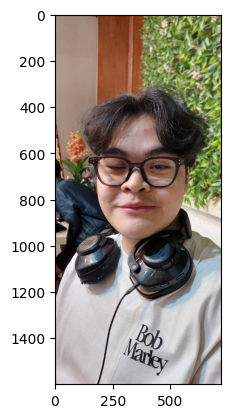

In [15]:
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image_rgb)

In [24]:
# from google.colab.patches import cv2_imshow
# cv2_imshow(sample_image)
# cv2_imshow(sample_image_gray)

In [28]:
dataset_dir = r'Y:\07\CV\FaceRecognition\ImageSample2'
images = []
labels = []
for root, dirs, files in os.walk(dataset_dir): #read images from file directory
    if len(files) == 0:
        continue
    for f in files:
        _, image = load_image(os.path.join(root, f)) #_, --> ga pake original image cuma gs
        if image is None:
            continue
        images.append(image)
        labels.append(root.split('/')[-1])

In [29]:
len(labels)

26

# Face detection

## face detection using hare cascade

In [30]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [31]:
def detect_faces(image_gray, scale_factor=1.1, min_neighbors=5, min_size=(30, 30)):
    faces = face_cascade.detectMultiScale(image_gray, scaleFactor=scale_factor, minNeighbors=min_neighbors, minSize=min_size)
    return faces

In [32]:
sample_face = detect_faces(sample_image_gray)
# array(x, y, w, h)
# x,y image -- w,h bounding box
detect_faces(sample_image_gray)

array([[133, 481, 458, 458]], dtype=int32)

## cropping faces

In [34]:
# Cropping Faces
def crop_faces(image_gray, faces, return_all=False): # return_all = false, ngambil yg lng besar, true--> ambil semua
    cropped_faces = []
    selected_faces = []
    if len(faces) > 0:
        if return_all:
            for x, y, w, h in faces:
                selected_faces.append((x, y, w, h))
                cropped_faces.append(image_gray[y:y+h, x:x+w])
        else:
            x, y, w, h = max(faces, key=lambda rect: rect[2] * rect[3])
            selected_faces.append((x, y, w, h))
            cropped_faces.append(image_gray[y:y+h, x:x+w])
    return cropped_faces, selected_faces

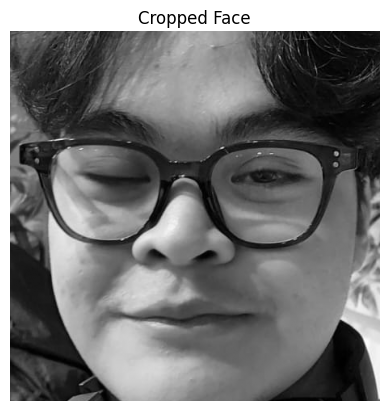

In [36]:
sample_image_face,_ = crop_faces(sample_image_gray, sample_face)

plt.imshow(sample_image_face[0], cmap='gray')  # Assuming it's grayscale
plt.title("Cropped Face")
plt.axis('off')
plt.show()


## Resize and Flatten Faces

In [37]:
face_size = (128, 128)
# 2D --> 1D
def resize_and_flatten(face):
    face_resized = cv2.resize(face, face_size)
    face_flattened = face_resized.flatten()
    return face_flattened

## Prepare Training and Testing Data


In [38]:
#from sklearn.model_selection import train_test_split
X = []
y = []
for image, label in zip(images, labels):
    faces = detect_faces(image)
    cropped_faces, _ = crop_faces(image, faces)
    if len(cropped_faces) > 0:
        face_flattened = resize_and_flatten(cropped_faces[0])
        X.append(face_flattened)
        y.append(label)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=177, stratify=y)


## Mean Centering

In [39]:
#from sklearn.base import BaseEstimator, TransformerMixin
class MeanCentering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.mean_face = np.mean(X, axis=0)
        return self

    def transform(self, X):
        return X - self.mean_face

## Build Classifier with PCA and SVM

In [40]:
#tahapan proses
pipe = Pipeline([
    ('centering', MeanCentering()),
    ('pca', PCA(svd_solver='randomized', whiten=True, random_state=177)),
    ('svc', SVC(kernel='linear', random_state=177))
])

## Train and Evaluate the Model

In [41]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

                                               precision    recall  f1-score   support

 Y:\07\CV\FaceRecognition\ImageSample2\Daniel       0.50      0.50      0.50         2
Y:\07\CV\FaceRecognition\ImageSample2\Michael       0.80      0.80      0.80         5

                                     accuracy                           0.71         7
                                    macro avg       0.65      0.65      0.65         7
                                 weighted avg       0.71      0.71      0.71         7



## Visualizing Eigenfaces

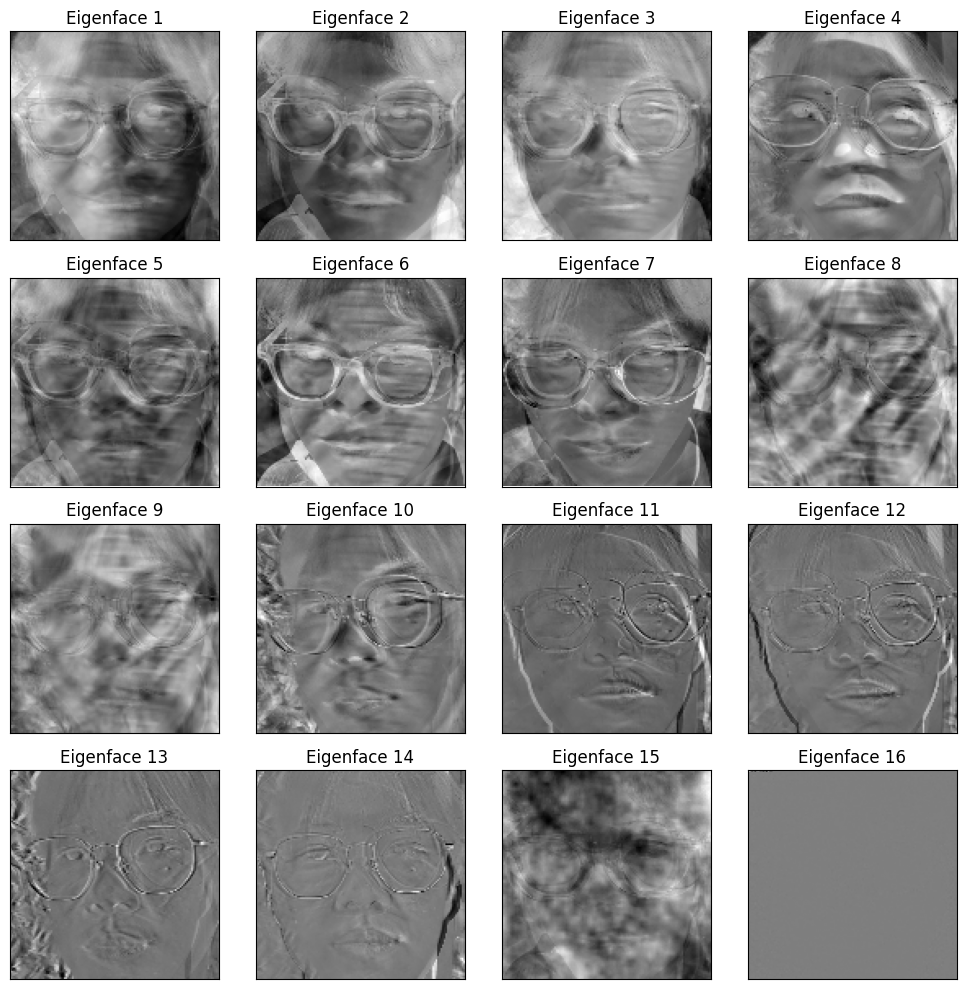

In [42]:
n_components = len(pipe[1].components_)
ncol = 4
nrow = (n_components + ncol - 1) // ncol
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 2.5*nrow), subplot_kw={'xticks':[], 'yticks':[]})

eigenfaces = pipe[1].components_.reshape((n_components, X_train.shape[1]))
for i, ax in enumerate(axes.flat[:n_components]):
    ax.imshow(eigenfaces[i].reshape(face_size), cmap='gray')
    ax.set_title(f'Eigenface {i+1}')

plt.tight_layout()
plt.show()

## Save the Model Pipeline

In [24]:
with open('eigenface_pipeline.pkl', 'wb') as f: #save model
    pickle.dump(pipe, f)

## Get Eigenface Score

In [43]:
# def get_eigenface_score(X):
#     X_pca = pipe[:2].transform(X)
#     eigenface_scores = np.max(pipe[2].decision_function(X_pca), axis=1)
#     return eigenface_scores


def get_eigenface_score(X):
    # Reshape to 2D if 1D
    if X.ndim == 1:
        X = X.reshape(1, -1)

    X_pca = pipe[:2].transform(X)

    # Ensure X_pca is 2D for decision_function
    if X_pca.ndim == 1:
        X_pca = X_pca.reshape(1, -1)

    # Get decision function values
    decision_values = pipe[2].decision_function(X_pca)

    # Handle potential 1D output from decision_function
    if decision_values.ndim == 1:
        eigenface_scores = np.max(decision_values)
    else:
        eigenface_scores = np.max(decision_values, axis=1)

    return eigenface_scores

## Prediction Function

In [44]:
def eigenface_prediction(image_gray):
    faces = detect_faces(image_gray)
    cropped_faces, selected_faces = crop_faces(image_gray, faces)

    if len(cropped_faces) == 0:
        return 'No face detected.'

    X_face = [resize_and_flatten(face) for face in cropped_faces]
    X_face = np.array(X_face)

    labels = pipe.predict(X_face)
    scores = get_eigenface_score(X_face)

    return scores, labels, selected_faces

In [45]:
print(sample_image_gray.shape)


(1600, 720)


In [46]:
sample_score, sample_label, sample_face_2  = eigenface_prediction(sample_image_gray) # acc, lable, xywh

## Draw Bounding Box and Label

In [47]:
def draw_text(image, label, score, font=cv2.FONT_HERSHEY_SIMPLEX, pos=(0, 0), font_scale=0.6, font_thickness=2, text_color=(0, 0, 0), text_color_bg=(0, 255, 0)):
    x, y = pos
    score_text = f'Score: {score:.2f}'
    (w1, h1), _ = cv2.getTextSize(score_text, font, font_scale, font_thickness)
    (w2, h2), _ = cv2.getTextSize(label, font, font_scale, font_thickness)

    cv2.rectangle(image, (x, y-h1-h2-25), (x + max(w1, w2)+20, y), text_color_bg, -1)
    cv2.putText(image, label, (x+10, y-10), font, font_scale, text_color, font_thickness)
    cv2.putText(image, score_text, (x+10, y-h2-15), font, font_scale, text_color, font_thickness)


## Draw Results

In [48]:

# def draw_result(image, scores, labels, coords):
#     result_image = image.copy()
#     for (x, y, w, h), label, score in zip(coords, labels, scores):
#         cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         draw_text(result_image, label, score, pos=(x, y))
#     return result_image

def draw_result(image, scores, labels, coords):
    result_image = image.copy()
    if not isinstance(scores, (list, tuple, np.ndarray)):
        scores = [scores]  # Convert to list if single score

    for (x, y, w, h), label, score in zip(coords, labels, scores):
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        draw_text(result_image, label, score, pos=(x, y))
    return result_image

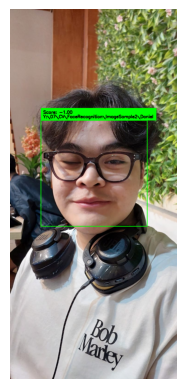

In [55]:
# Assuming result comes from OpenCV (BGR), convert to RGB
result = draw_result(sample_image, sample_score, sample_label, sample_face_2)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(result)
plt.axis('off')  # Hide axes if you don't want them
plt.show()

In [1]:
!pip install opencv-python



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install joblib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.1 MB 9.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.1 MB 10.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 11.4 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   -- ------------------------------------- 2.4/41.0 MB 11.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/41.0 MB 10.7 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/41.0 MB 10.3 MB/s eta 0:00:04
   -------- ------------------------------- 8.7/41.0 MB 10.4 MB/s eta 0:00:04
   ---------- ----------------------------- 10.7/41.0 MB 10.5 MB/s eta 0:00:03



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install matplotlib
!pip install numpy

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 12.3 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 13.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------  2.6/2.7 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 11.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Press 'q' to quit
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast together with shapes (1,10000) (16384,) 
operands could not be broadcast t

In [2]:
import cv2
import numpy as np
import pickle
from sklearn.base import BaseEstimator, TransformerMixin

# Define the MeanCentering class
class MeanCentering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.mean_face = np.mean(X, axis=0)
        return self

    def transform(self, X):
        return X - self.mean_face

# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the trained Eigenface model
with open('eigenface_pipeline.pkl', 'rb') as f:
    pipe = pickle.load(f)

# Function to detect faces in a frame
def detect_faces(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces, gray

# Function to predict the label for a cropped face
def predict_label(face):
    face_resized = cv2.resize(face, (128, 128))  # Resize to match the training size
    face_flattened = face_resized.flatten().reshape(1, -1)  # Flatten and reshape for prediction
    label = pipe.predict(face_flattened)[0]  # Predict the label
    return label

# Initialize the camera
camera = cv2.VideoCapture(0)

print("Starting face detection with predictions. Press 'q' to quit.")
while True:
    ret, frame = camera.read()
    if not ret:
        break

    # Detect faces in the frame
    faces, gray = detect_faces(frame)

    # Draw rectangles around detected faces and add predicted labels
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]  # Crop the face
        label = predict_label(face)  # Predict the label using the Eigenface model
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)  # Green box with thickness 3
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)  # Add label above the box

    # Display the frame with detected faces and labels
    cv2.imshow("Face Detection with Predictions", frame)

    # Exit the loop when 'q' is pressed
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

# Release the camera and close all windows
camera.release()
cv2.destroyAllWindows()

Starting face detection with predictions. Press 'q' to quit.


In [1]:
import cv2
import numpy as np
import joblib
from sklearn.base import BaseEstimator, TransformerMixin

# --- Define any custom transformers used in the pipeline ---
class MeanCentering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.mean_face = np.mean(X, axis=0)
        return self

    def transform(self, X):
        return X - self.mean_face

# --- Load the Haar Cascade face detector ---
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# --- Load the trained pipeline (update filename if needed) ---
pipeline = joblib.load("eigenface_pipeline.pkl")  # Or "eigenface_pipeline.pkl" if using that one

# --- Function to detect faces ---
def detect_faces(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces, gray

# --- Function to predict label for a face ---
def predict_label(face_gray):
    face_resized = cv2.resize(face_gray, (128, 128))
    face_flattened = face_resized.flatten().reshape(1, -1)
    label = pipeline.predict(face_flattened)[0]
    return label

# --- Initialize webcam ---
cap = cv2.VideoCapture(0)
print("Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    faces, gray = detect_faces(frame)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        label = predict_label(face)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    cv2.imshow("Eigenface Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Press 'q' to quit.


In [1]:
import cv2
import joblib
import numpy as np

# Load your saved pipeline
pipeline = joblib.load("WorkshopCV2.pkl")  # Make sure this matches your file

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)

print("Press 'q' to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]

        try:
            # Resize and flatten to match the pipeline's input
            face_resized = cv2.resize(face_roi, (128, 128))  # Change to (100, 100) if needed
            face_flattened = face_resized.flatten().reshape(1, -1)

            # Predict
            prediction = pipeline.predict(face_flattened)
            label = prediction[0]
        except Exception as e:
            label = "Error"
            print("Prediction error:", e)

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, str(label), (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Eigenface Recognition", frame)

    # Exit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


AttributeError: Can't get attribute 'MeanCentering' on <module '__main__'>